In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from analysis_utils import *
from data_analysis import *
import os

# Plot the series of ping RTTs 

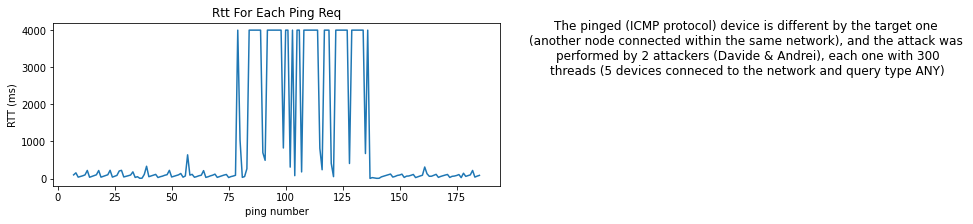

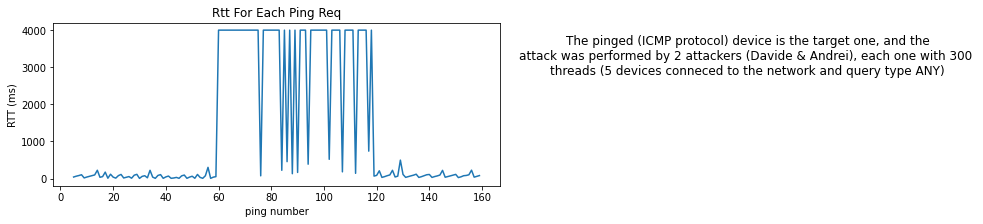

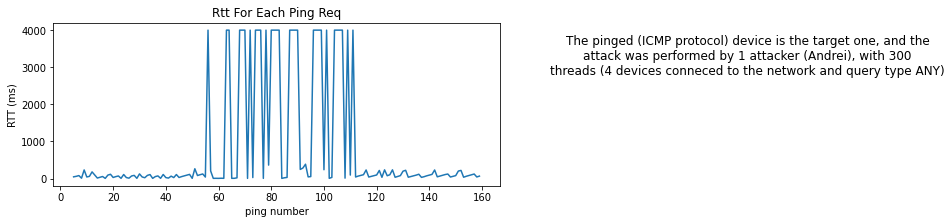

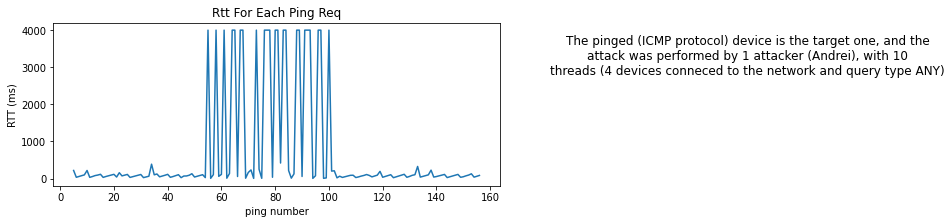

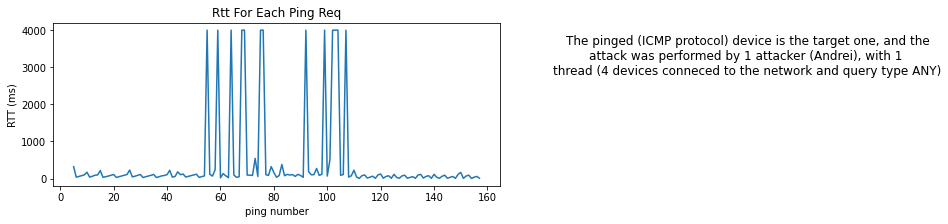

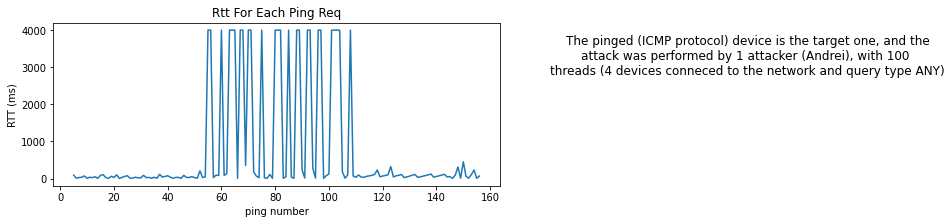

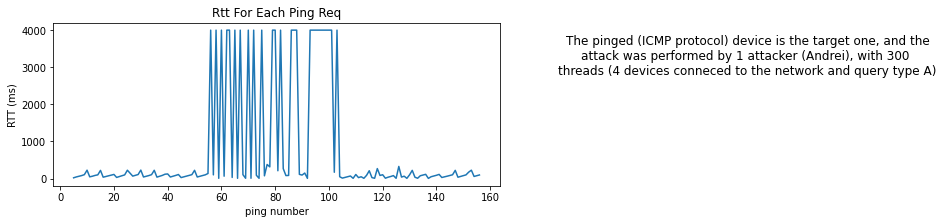

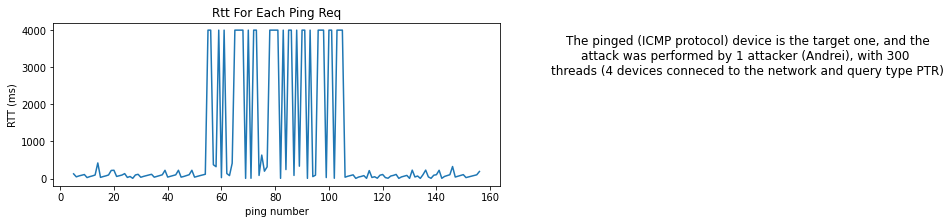

In [2]:
for filename in os.listdir("./data/ping"):
    plot_RTT_per_ping("./data/ping/"+filename)

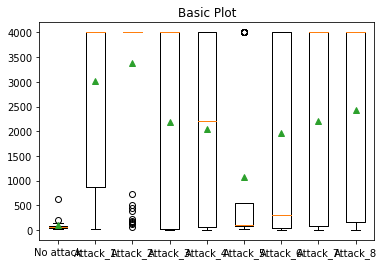

In [3]:
plot_boxplot("./data/ping/")